In [1]:
# Importing Supporting Libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
df=pd.read_csv('advanced_house_price_pred.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Dataset size

df.shape

(1460, 81)

In [4]:
# File Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Checking Null values in the data

df_col_null=df.columns[df.isnull().any()==True].tolist()
df[df_col_null].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [6]:
# Number of columns containing null values

df[df_col_null].isnull().sum().count()

19

In [7]:
# Five point summery

df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
#Checking correlation with the target

df.corr().SalePrice.sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [9]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
df.OverallQual.value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [11]:
# Checking datatypes of features

df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [12]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
# dataframe with Categorical features

df.select_dtypes('object').head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [14]:
# Dataframe with INT dtype columns

int_df=df.select_dtypes('int')
int_df.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [15]:
int_df.shape

(1460, 35)

In [16]:
# Dataframe with FLOAT dtype columns

float_df=df.select_dtypes('float')
float_df.head()

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0


In [17]:
float_df.shape

(1460, 3)

In [18]:
# Dataframe with numerical columns

num_df=pd.concat([int_df,float_df], axis=1, join="outer")
num_df.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotFrontage,MasVnrArea,GarageYrBlt
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,0,2,2008,208500,65.0,196.0,2003.0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,0,5,2007,181500,80.0,0.0,1976.0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,0,9,2008,223500,68.0,162.0,2001.0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,0,2,2006,140000,60.0,0.0,1998.0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,0,12,2008,250000,84.0,350.0,2000.0


In [19]:
num_df.shape

(1460, 38)

In [20]:
num_df.isnull().sum()

Id                 0
MSSubClass         0
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
LotFrontage      259
MasVnrArea         8
GarageYrBlt       81
dtype: int64

In [21]:
num_df.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [22]:
num_df.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotFrontage,MasVnrArea,GarageYrBlt
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000,1452.000000,1379.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,70.049958,103.685262,1978.506164
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,24.284752,181.066207,24.689725
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,21.000000,0.000000,1900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,59.000000,0.000000,1961.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,69.000000,0.000000,1980.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,80.000000,166.000000,2002.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,313.000000,1600.000000,2010.000000


In [23]:
df.corr().SalePrice.sort_values(ascending=False).head(20)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
Name: SalePrice, dtype: float64

In [24]:
df.corr().SalePrice.sort_values(ascending=False).tail(20)

OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [25]:
# Removing null values in numerical columns by filling it with median

num_df = num_df.fillna(num_df.median())
num_df.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotFrontage,MasVnrArea,GarageYrBlt
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,0,2,2008,208500,65.0,196.0,2003.0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,0,5,2007,181500,80.0,0.0,1976.0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,0,9,2008,223500,68.0,162.0,2001.0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,0,2,2006,140000,60.0,0.0,1998.0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,0,12,2008,250000,84.0,350.0,2000.0


In [26]:
np.median(num_df['LotArea'])

9478.5

In [27]:
num_df.isnull().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
LotFrontage      0
MasVnrArea       0
GarageYrBlt      0
dtype: int64

## *Feature Analysis for numerical variables*

C:\Users\Saumya\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


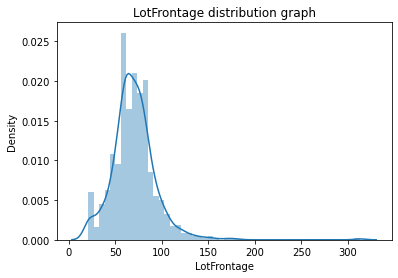

In [28]:
sns.distplot(df['LotFrontage'])
plt.title('LotFrontage distribution graph')
plt.show()

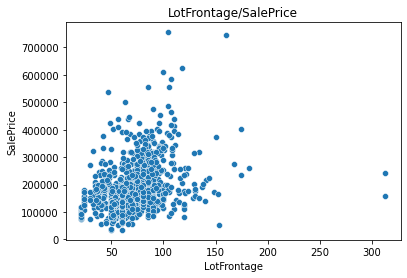

In [29]:
sns.scatterplot(x=df.LotFrontage,y=df.SalePrice)
plt.xlabel("LotFrontage")
plt.ylabel("SalePrice")
plt.title("LotFrontage/SalePrice")
plt.show()

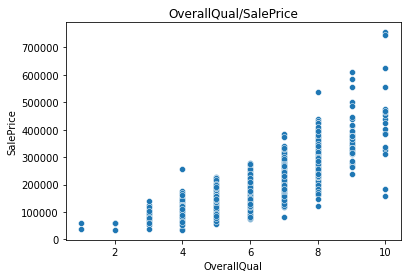

In [30]:
sns.scatterplot(x=df.OverallQual,y=df.SalePrice)
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")

plt.title("OverallQual/SalePrice")
plt.show()

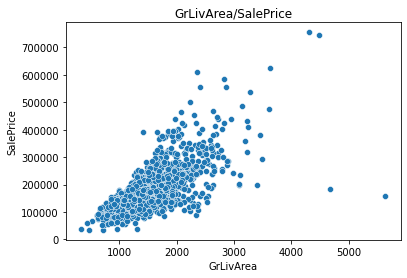

In [31]:
sns.scatterplot(x=df.GrLivArea,y=df.SalePrice)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.title("GrLivArea/SalePrice")
plt.show()

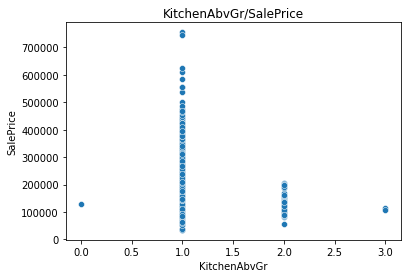

In [32]:
sns.scatterplot(x=df.KitchenAbvGr,y=df.SalePrice)
plt.xlabel("KitchenAbvGr")
plt.ylabel("SalePrice")
plt.title("KitchenAbvGr/SalePrice")
plt.show()

C:\Users\Saumya\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


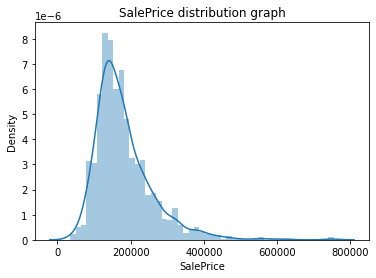

In [33]:
sns.distplot(df['SalePrice'])
plt.title('SalePrice distribution graph')
plt.show()

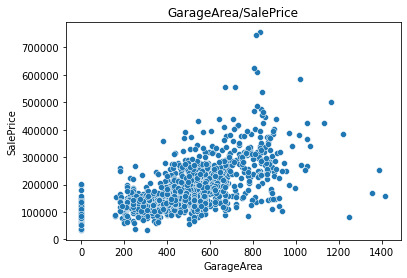

In [34]:
sns.scatterplot(x=df.GarageArea,y=df.SalePrice)
plt.xlabel("GarageArea")
plt.ylabel("SalePrice")
plt.title("GarageArea/SalePrice")
plt.show()

<AxesSubplot:>

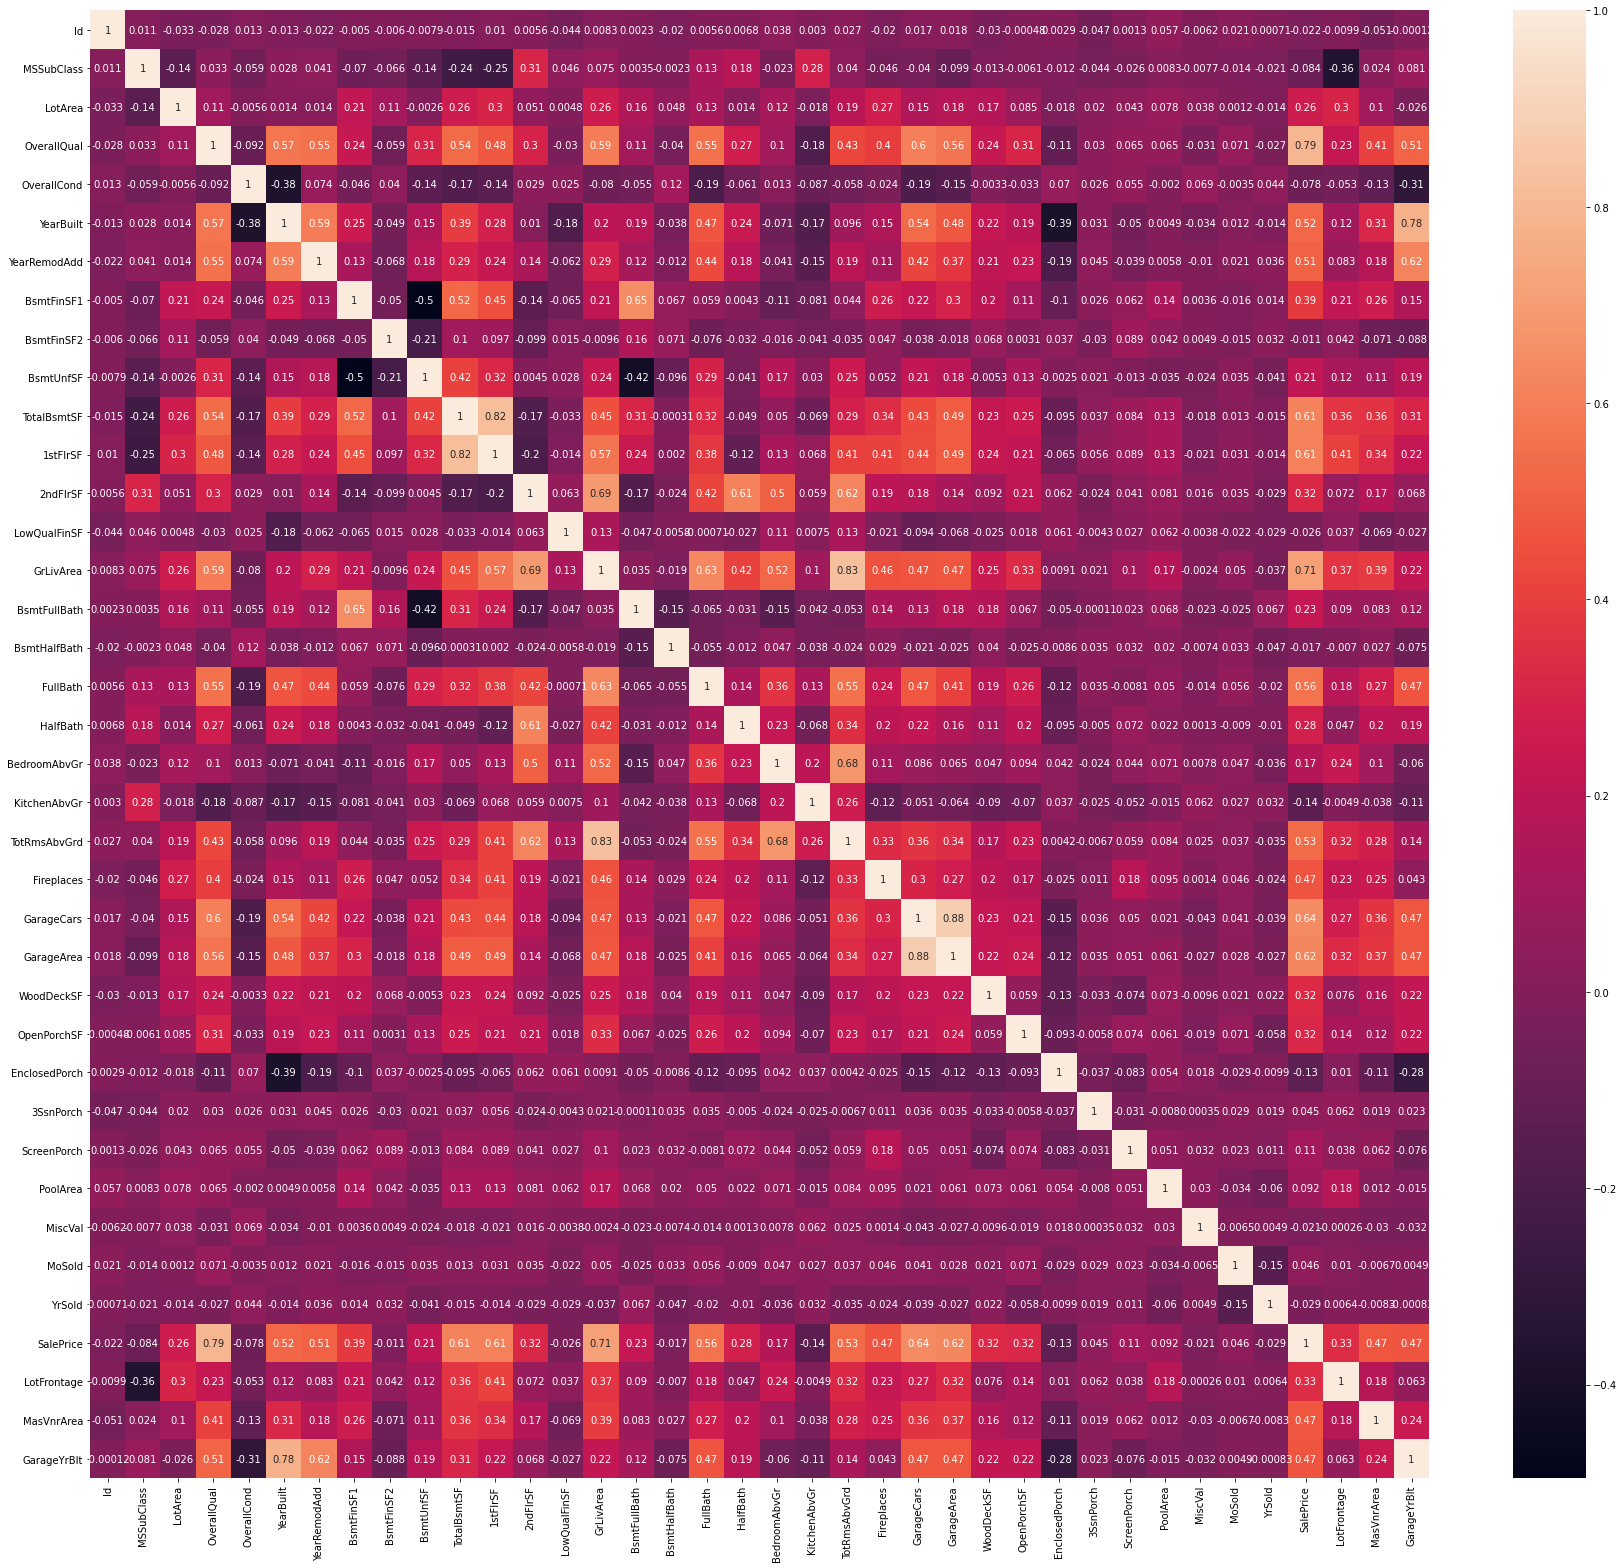

In [35]:
#Heatmap of 37 features

plt.figure(figsize=(30,27))

sns.heatmap(num_df.corr(),annot=True)

In [36]:
# Mutlticollearity between Garage Area Garage Cars, also between Totalbsmtsf and firstfloorsf.

In [37]:
num_df.corr().SalePrice.sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
GarageYrBlt      0.466754
BsmtFinSF1       0.386420
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

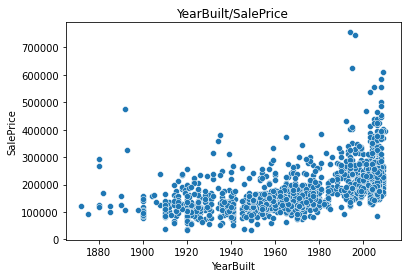

In [38]:
sns.scatterplot(x=df.YearBuilt,y=df.SalePrice)
plt.ylabel("SalePrice")
plt.xlabel("YearBuilt")
plt.title("YearBuilt/SalePrice")
plt.show()

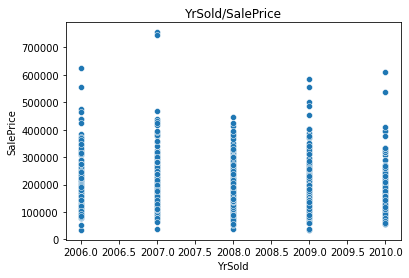

In [39]:
sns.scatterplot(x=df.YrSold,y=df.SalePrice)
plt.ylabel("SalePrice")
plt.xlabel("YrSold")
plt.title("YrSold/SalePrice")
plt.show()

In [40]:
ob_df=df.select_dtypes('object')
ob_df.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [41]:
# Checking null values in categorical features

ob_df_col_null=ob_df.columns[ob_df.isnull().any()==True].tolist()
ob_df[ob_df_col_null].isnull().sum()

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [42]:
# Number of features containing null values

ob_df[ob_df_col_null].isnull().sum().count()

16

In [43]:
#1. Function to impute null value with new category

def impute_nan_create_category(ob_df,ColName):
     ob_df[ColName] = np.where(ob_df[ColName].isnull(),"Unknown",ob_df[ColName])
## Call function to create new category for variables
for Columns in ['Alley','PoolQC','MiscFeature','Fence','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond']:
    impute_nan_create_category(ob_df,Columns)
#2. Display result
ob_df[['Alley','PoolQC','MiscFeature','Fence','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond']].head(10)


<ipython-input-43-4b0ca6974c51>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ob_df[ColName] = np.where(ob_df[ColName].isnull(),"Unknown",ob_df[ColName])


,Alley,PoolQC,MiscFeature,Fence,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond
0,Unknown,Unknown,Unknown,Unknown,Unknown,Attchd,RFn,TA,TA
1,Unknown,Unknown,Unknown,Unknown,TA,Attchd,RFn,TA,TA
2,Unknown,Unknown,Unknown,Unknown,TA,Attchd,RFn,TA,TA
3,Unknown,Unknown,Unknown,Unknown,Gd,Detchd,Unf,TA,TA
4,Unknown,Unknown,Unknown,Unknown,TA,Attchd,RFn,TA,TA
5,Unknown,Unknown,Shed,MnPrv,Unknown,Attchd,Unf,TA,TA
6,Unknown,Unknown,Unknown,Unknown,Gd,Attchd,RFn,TA,TA
7,Unknown,Unknown,Shed,Unknown,TA,Attchd,RFn,TA,TA
8,Unknown,Unknown,Unknown,Unknown,TA,Detchd,Unf,Fa,TA
9,Unknown,Unknown,Unknown,Unknown,TA,Attchd,RFn,Gd,TA


In [44]:
ob_df_col_null=ob_df.columns[ob_df.isnull().any()==True].tolist()
ob_df[ob_df_col_null].isnull().sum()

MasVnrType       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
dtype: int64

In [45]:
# Function to impute null value with new category
def impute_nan_create_category(ob_df,ColName):
     ob_df[ColName] = np.where(ob_df[ColName].isnull(),"Unknown",ob_df[ColName])
## Call function to create new category for variables
for Columns in ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical']:
    impute_nan_create_category(ob_df,Columns)
#2. Display result
ob_df[['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical']].head(10)


<ipython-input-45-38b7fbfe621f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ob_df[ColName] = np.where(ob_df[ColName].isnull(),"Unknown",ob_df[ColName])


,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical
0,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr
1,None,Gd,TA,Gd,ALQ,Unf,SBrkr
2,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr
3,None,TA,Gd,No,ALQ,Unf,SBrkr
4,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr
5,None,Gd,TA,No,GLQ,Unf,SBrkr
6,Stone,Ex,TA,Av,GLQ,Unf,SBrkr
7,Stone,Gd,TA,Mn,ALQ,BLQ,SBrkr
8,None,TA,TA,No,Unf,Unf,FuseF
9,None,TA,TA,No,GLQ,Unf,SBrkr


In [46]:
ob_df_col_null=ob_df.columns[ob_df.isnull().any()==True].tolist()
ob_df[ob_df_col_null].isnull().sum()

Series([], dtype: float64)

In [47]:
ob_df.isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [48]:
ob_df.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Unknown,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Unknown,Unknown,Unknown,WD,Normal
1,RL,Pave,Unknown,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,Unknown,Unknown,Unknown,WD,Normal
2,RL,Pave,Unknown,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Unknown,Unknown,Unknown,WD,Normal
3,RL,Pave,Unknown,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,Unknown,Unknown,Unknown,WD,Abnorml
4,RL,Pave,Unknown,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,Unknown,Unknown,Unknown,WD,Normal


## *Feature Analysis for categorical variables*

In [49]:
for column in ob_df.columns:                                # value_counts Loop
    print("\n" + column)
    print(ob_df[column].value_counts())


MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Street
Pave    1454
Grvl       6
Name: Street, dtype: int64

Alley
Unknown    1369
Grvl         50
Pave         41
Name: Alley, dtype: int64

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU     

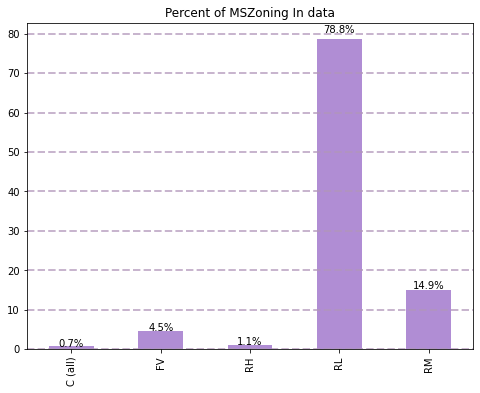

In [50]:
# MSZoning Precentage

df_exp = ob_df['MSZoning'].value_counts(normalize=True).to_frame('Percent')
df_exp['Percent'] = round(df_exp['Percent'].mul(100),1)

df_exp = df_exp.sort_index(ascending=True)
ax = df_exp.plot.bar(color='#8f5dc3', alpha=0.7,figsize=(8, 6), title ="Percent of MSZoning In data", legend=None )
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}%', (x + width/2, y + height*1.02), ha='center')
plt.grid(color='#b196ba', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

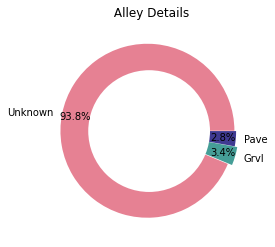

In [51]:
# Setting labels for items in Chart
values=ob_df.Alley.value_counts()
names = ["Unknown", "Grvl","Pave"]
colors = ["#E68193","#459E97","#3f3a91"]
explode = (0.01, 0.01,0.01)
# Setting size in Chart based on 

# explosion
explode = (0.02, 0.03, 0)
  
# Pie Chart
plt.pie(values, colors=colors, labels=names,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title(' Alley Details')
  
# Displaing Chart
plt.show()

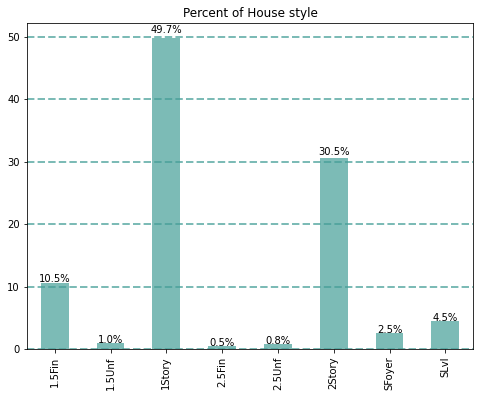

In [52]:
#  HouseStyle Precentage

df_exp = ob_df['HouseStyle'].value_counts(normalize=True).to_frame('Percent')
df_exp['Percent'] = round(df_exp['Percent'].mul(100),1)

df_exp = df_exp.sort_index(ascending=True)
ax = df_exp.plot.bar(color='#459E97', alpha=0.7,figsize=(8, 6), title ="Percent of House style", legend=None )
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x,y = p.get_xy() 
    ax.annotate(f'{height}%', (x + width/2, y + height*1.02), ha='center')
plt.grid(color='#459E97', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

C:\Users\Saumya\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


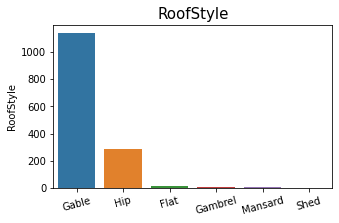

In [53]:
# RoofStyle

plt.figure(figsize=(5,3))
plt.xticks(rotation=15)
plt.title('RoofStyle',fontsize=15)
sns.barplot((ob_df.RoofStyle.value_counts()).index,ob_df.RoofStyle.value_counts());

C:\Users\Saumya\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


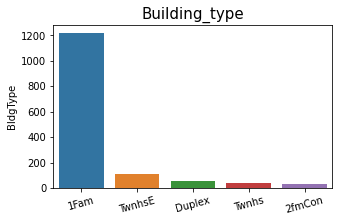

In [54]:
# BldgType
plt.figure(figsize=(5,3))
plt.xticks(rotation=15)
plt.title('Building_type',fontsize=15)
sns.barplot((ob_df.BldgType.value_counts()).index,ob_df.BldgType.value_counts());

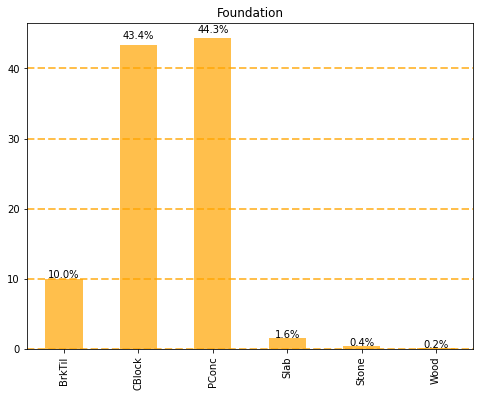

In [55]:
# Foundation Precentage

df_exp = ob_df['Foundation'].value_counts(normalize=True).to_frame('Percent')
df_exp['Percent'] = round(df_exp['Percent'].mul(100),1)

df_exp = df_exp.sort_index(ascending=True)
ax = df_exp.plot.bar(color='#FFA500', alpha=0.7,figsize=(8, 6), title ="Foundation", legend=None )
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}%', (x + width/2, y + height*1.02), ha='center')
plt.grid(color='#FFA500', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

Text(0.5, 1.0, 'LotConfig')

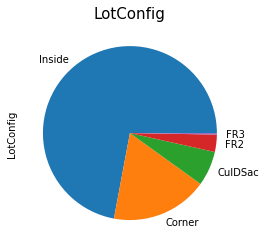

In [56]:
# LotConfig

ob_df.LotConfig.value_counts().plot(kind='pie')
plt.title("LotConfig",fontsize=15)

C:\Users\Saumya\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Condition1')

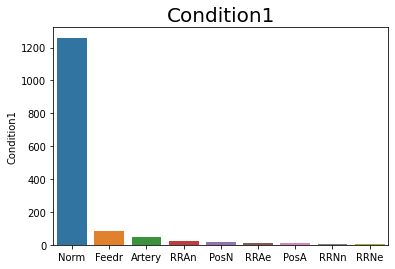

In [57]:
# Condition1
sns.barplot(ob_df.Condition1.value_counts().index, ob_df.Condition1.value_counts());
plt.xticks(rotation=0)
plt.title("Condition1",fontsize=20)


C:\Users\Saumya\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Neighborhood')

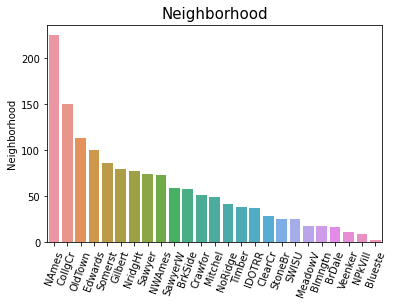

In [58]:
# Neighborhood
sns.barplot(ob_df.Neighborhood.value_counts().index, ob_df.Neighborhood.value_counts());
plt.xticks(rotation=70)
plt.title("Neighborhood",fontsize=15)




Text(0.5, 1.0, 'GarageType')

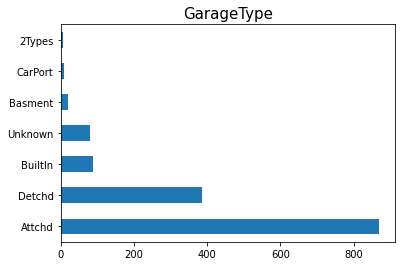

In [59]:
# GarageType
ob_df.GarageType.value_counts().plot(kind='barh')
plt.title("GarageType",fontsize=15)

## *Label encoding and One hot coding for categorical features*

In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in df:
    if df[col].dtype == 'object':
            # Train on the training data
            le.fit(df[col])
            # Transform both training and testing data
            ob_df[col] = le.transform(df[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

43 columns were label encoded.


<ipython-input-60-b4f0059dbdd6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ob_df[col] = le.transform(df[col])


In [61]:
# one-hot encoding of categorical variables
ob_df = pd.get_dummies(ob_df)

print('Dataframe shape: ', ob_df.shape)


Dataframe shape:  (1460, 43)


In [62]:
ob_df.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,2,3,3,0,4,0,5,2,...,1,1,4,4,2,3,4,4,8,4
1,3,1,2,3,3,0,2,0,24,1,...,1,1,4,4,2,3,4,4,8,4
2,3,1,2,0,3,0,4,0,5,2,...,1,1,4,4,2,3,4,4,8,4
3,3,1,2,0,3,0,0,0,6,2,...,5,2,4,4,2,3,4,4,8,0
4,3,1,2,0,3,0,2,0,15,2,...,1,1,4,4,2,3,4,4,8,4


In [63]:
num_df.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotFrontage,MasVnrArea,GarageYrBlt
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,0,2,2008,208500,65.0,196.0,2003.0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,0,5,2007,181500,80.0,0.0,1976.0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,0,9,2008,223500,68.0,162.0,2001.0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,0,2,2006,140000,60.0,0.0,1998.0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,0,12,2008,250000,84.0,350.0,2000.0


In [64]:
num_df.shape

(1460, 38)

In [65]:
ob_df.shape

(1460, 43)

In [66]:
new_df=pd.concat([num_df,ob_df], axis=1, join="outer")
new_df.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1,60,8450,7,5,2003,2003,706,0,150,...,1,1,4,4,2,3,4,4,8,4
1,2,20,9600,6,8,1976,1976,978,0,284,...,1,1,4,4,2,3,4,4,8,4
2,3,60,11250,7,5,2001,2002,486,0,434,...,1,1,4,4,2,3,4,4,8,4
3,4,70,9550,7,5,1915,1970,216,0,540,...,5,2,4,4,2,3,4,4,8,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,1,1,4,4,2,3,4,4,8,4


In [67]:
new_df.shape

(1460, 81)

In [68]:
new_df_col_null=new_df.columns[new_df.isnull().any()==True].tolist()
new_df[new_df_col_null].isnull().sum()

Series([], dtype: float64)

## *Outlier checking and removal*


In [69]:
for i in range(1,80):
    q75,q25= np.percentile(new_df.iloc[:,i],[75,25])
    iqr = q75-q25
    min = q25 -(iqr*1.5)
    max = q75+(iqr*1.5)
new_df = new_df.drop(new_df[new_df.iloc[:,i] < min].index)    
new_df = new_df.drop(new_df[new_df.iloc[:,i] > max].index)    

In [70]:
new_df.shape

(1267, 81)

In [71]:
Df=new_df.drop(['Id'],axis=1)
Df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,8450,7,5,2003,2003,706,0,150,856,...,1,1,4,4,2,3,4,4,8,4
1,20,9600,6,8,1976,1976,978,0,284,1262,...,1,1,4,4,2,3,4,4,8,4
2,60,11250,7,5,2001,2002,486,0,434,920,...,1,1,4,4,2,3,4,4,8,4
3,70,9550,7,5,1915,1970,216,0,540,756,...,5,2,4,4,2,3,4,4,8,0
4,60,14260,8,5,2000,2000,655,0,490,1145,...,1,1,4,4,2,3,4,4,8,4


In [72]:
Df.shape

(1267, 80)

In [73]:
Df.corr().SalePrice.sort_values(ascending=False).head(15)

SalePrice       1.000000
OverallQual     0.778105
GrLivArea       0.749274
TotalBsmtSF     0.625578
GarageCars      0.621086
1stFlrSF        0.614733
GarageArea      0.606857
FullBath        0.566143
TotRmsAbvGrd    0.522220
YearBuilt       0.487460
Fireplaces      0.478249
YearRemodAdd    0.474534
MasVnrArea      0.432585
GarageYrBlt     0.422290
BsmtFinSF1      0.412084
Name: SalePrice, dtype: float64

In [74]:
Df.corr().SalePrice.sort_values(ascending=False).tail(15)

KitchenAbvGr   -0.131054
BsmtFinType1   -0.136481
PoolQC         -0.162153
MSZoning       -0.183210
BsmtExposure   -0.277317
LotShape       -0.286170
HeatingQC      -0.365849
FireplaceQu    -0.408581
GarageType     -0.429324
KitchenQual    -0.522621
GarageFinish   -0.535786
BsmtQual       -0.541797
ExterQual      -0.583900
Utilities            NaN
SaleType             NaN
Name: SalePrice, dtype: float64

In [75]:
X=Df.drop(['SalePrice'],axis=1)
X.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,8450,7,5,2003,2003,706,0,150,856,...,1,1,4,4,2,3,4,4,8,4
1,20,9600,6,8,1976,1976,978,0,284,1262,...,1,1,4,4,2,3,4,4,8,4
2,60,11250,7,5,2001,2002,486,0,434,920,...,1,1,4,4,2,3,4,4,8,4
3,70,9550,7,5,1915,1970,216,0,540,756,...,5,2,4,4,2,3,4,4,8,0
4,60,14260,8,5,2000,2000,655,0,490,1145,...,1,1,4,4,2,3,4,4,8,4


In [76]:
y=Df.SalePrice
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

## *feature_importance*


In [77]:
from sklearn.ensemble import RandomForestRegressor
selection= RandomForestRegressor()
selection.fit(X,y)

RandomForestRegressor()

In [78]:
print(selection.feature_importances_)

[1.44119601e-03 1.21285202e-02 4.69108875e-01 5.06335283e-03
 1.03527598e-02 5.45021472e-03 3.50400733e-02 7.26989627e-04
 4.04211978e-03 4.61084987e-02 2.64312060e-02 3.29967826e-02
 9.64602410e-05 2.00871121e-01 1.00235940e-03 2.91373055e-04
 9.92766057e-04 7.96397627e-04 1.11104131e-03 7.43608262e-04
 1.56980544e-03 2.78412515e-03 1.46945587e-02 3.55366621e-02
 3.93237063e-03 3.11115554e-03 8.79690607e-04 8.09529630e-05
 1.17678035e-03 1.86493149e-04 1.04793729e-04 2.80361389e-03
 1.34838745e-03 4.85015711e-03 6.63207547e-03 4.18799983e-03
 2.55954322e-03 2.45541529e-06 1.95791831e-04 2.02155837e-03
 1.32657030e-03 0.00000000e+00 1.33494170e-03 6.72312066e-04
 5.88388324e-03 6.37773591e-04 3.39840604e-05 3.87497732e-04
 1.33557706e-03 9.20782849e-04 5.82523914e-05 1.92924618e-03
 1.50510630e-03 6.49651804e-04 3.20664712e-03 4.99368596e-04
 7.12657483e-04 2.62311653e-03 3.53273957e-04 1.61581829e-03
 1.75362475e-03 6.61158631e-04 3.44603227e-05 8.84792851e-04
 4.00912679e-03 2.128438

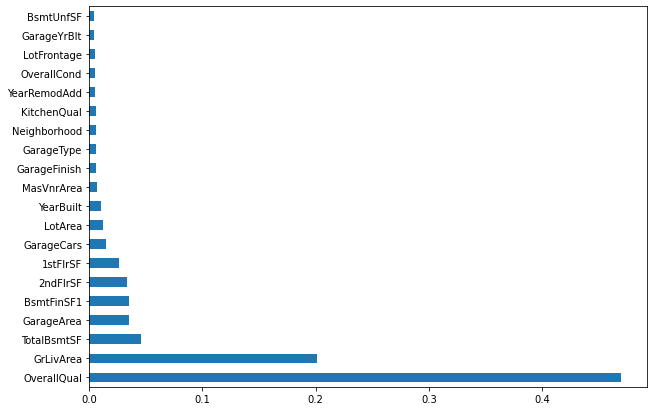

In [79]:
plt.figure(figsize = (10,7))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [80]:
X.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,8450,7,5,2003,2003,706,0,150,856,...,1,1,4,4,2,3,4,4,8,4
1,20,9600,6,8,1976,1976,978,0,284,1262,...,1,1,4,4,2,3,4,4,8,4
2,60,11250,7,5,2001,2002,486,0,434,920,...,1,1,4,4,2,3,4,4,8,4
3,70,9550,7,5,1915,1970,216,0,540,756,...,5,2,4,4,2,3,4,4,8,0
4,60,14260,8,5,2000,2000,655,0,490,1145,...,1,1,4,4,2,3,4,4,8,4


## *Scaling Independant variables*

In [81]:
from sklearn.preprocessing import scale
X_scaled=pd.DataFrame (scale(X), columns=X.columns)

In [82]:
X_scaled.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,0.063373,-0.196600,0.776120,-0.565482,1.167294,0.967099,0.646509,-0.296712,-0.924769,-0.411777,...,-0.795736,-0.390093,0.123532,0.07556,0.302349,0.063841,0.478076,0.195703,0.0,0.277386
1,-0.886853,-0.086735,0.016781,2.058936,0.254876,-0.364711,1.305695,-0.296712,-0.601170,0.601463,...,-0.795736,-0.390093,0.123532,0.07556,0.302349,0.063841,0.478076,0.195703,0.0,0.277386
2,0.063373,0.070896,0.776120,-0.565482,1.099708,0.917773,0.113345,-0.296712,-0.238932,-0.252054,...,-0.795736,-0.390093,0.123532,0.07556,0.302349,0.063841,0.478076,0.195703,0.0,0.277386
3,0.300930,-0.091512,0.776120,-0.565482,-1.806512,-0.660669,-0.540993,-0.296712,0.017049,-0.661343,...,1.239999,0.743502,0.123532,0.07556,0.302349,0.063841,0.478076,0.195703,0.0,-3.944209
4,0.063373,0.358453,1.535459,-0.565482,1.065915,0.819120,0.522912,-0.296712,-0.103697,0.309470,...,-0.795736,-0.390093,0.123532,0.07556,0.302349,0.063841,0.478076,0.195703,0.0,0.277386


## *Train test split* 


In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

## *1.Linear Regression*


In [84]:
from sklearn.linear_model import LinearRegression
model1= LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [85]:
from sklearn.metrics import r2_score,classification_report
y_predict1 = model1.predict(X_test)

lr=r2_score(y_test, y_predict1)
lr

0.8727834950738826

In [86]:
training_score=model1.score(X_train,y_train)
training_score

0.9067260855170728

In [87]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_predict1))
print('MSE:', metrics.mean_squared_error(y_test,y_predict1 ))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_predict1)))

MAE: 16622.50293547792
MSE: 575202090.5517168
RMSE: 23983.371125671987


In [88]:
lr_price= pd.DataFrame({'Actual':y_test,'Predict':y_predict1})
lr_price.head()

,Actual,Predict
897,142953,138858.901784
668,168000,174651.566341
653,135000,125984.316548
900,110000,104877.384799
386,81000,54591.469996


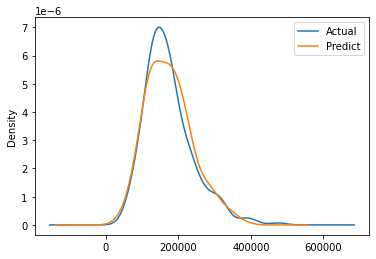

In [89]:
# Density plot for lr

lr_reg = lr_price.plot.kde()

## *2.Xgb regressor*

In [90]:
from xgboost import XGBRegressor
model2=XGBRegressor()
model2.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [91]:
from sklearn.metrics import r2_score,classification_report

y_predict2 = model2.predict(X_test)

xgb=(r2_score(y_test, y_predict2))
xgb

C:\Users\Saumya\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.8605896199053079

In [92]:
training_score=model2.score(X_train,y_train)
training_score

C:\Users\Saumya\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.999835456478345

In [93]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_predict2))
print('MSE:', metrics.mean_squared_error(y_test,y_predict2 ))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_predict2)))

MAE: 16763.650513656496
MSE: 630335993.915626
RMSE: 25106.49306286376


In [94]:
xgb_price= pd.DataFrame({'Actual':y_test,'Predict':y_predict2})
xgb_price.head()

,Actual,Predict
897,142953,126410.031250
668,168000,173982.031250
653,135000,131081.265625
900,110000,114321.773438
386,81000,102475.609375


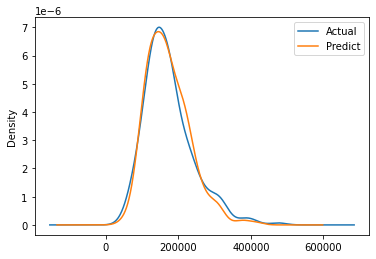

In [95]:
xgb_reg = xgb_price.plot.kde()

## *3.Ridge Regression*


In [96]:
from sklearn.linear_model import Ridge
model3=Ridge()
model3.fit(X_train,y_train)

Ridge()

In [97]:
y_predict3 = model3.predict(X_test)

rr=r2_score(y_test, y_predict3)
rr

0.8718823912399247

In [98]:
training_score=model3.score(X_train,y_train)
training_score

0.9066843291922084

In [99]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_predict3))
print('MSE:', metrics.mean_squared_error(y_test,y_predict3 ))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_predict3)))

MAE: 16681.741344746766
MSE: 579276379.5710365
RMSE: 24068.16111735661


In [100]:
rr_price= pd.DataFrame({'Actual':y_test,'Predict':y_predict3})
rr_price.head()

,Actual,Predict
897,142953,139063.432889
668,168000,174139.153558
653,135000,126324.519387
900,110000,105158.781788
386,81000,54461.898287


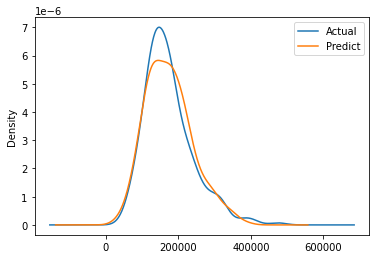

In [101]:
rr_reg = rr_price.plot.kde()

## *4.RandomForestRegressor*

In [102]:
from sklearn.ensemble import RandomForestRegressor
model4=RandomForestRegressor()
model4.fit(X_train,y_train)


RandomForestRegressor()

In [103]:
y_predict4 = model4.predict(X_test)

rf=r2_score(y_test, y_predict4)
rf

0.8833062899853737

In [104]:
training_score=model4.score(X_train,y_train)
training_score

0.9824807389012848

In [105]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predict4))
print('MSE:', metrics.mean_squared_error(y_test,y_predict4 ))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_predict4)))

MAE: 15846.48976377953
MSE: 527623880.2003803
RMSE: 22970.06487148829


In [106]:
rf_price= pd.DataFrame({'Actual':y_test,'Predict':y_predict4})
rf_price.head()

,Actual,Predict
897,142953,134569.46
668,168000,162871.07
653,135000,133714.16
900,110000,114536.18
386,81000,95771.30


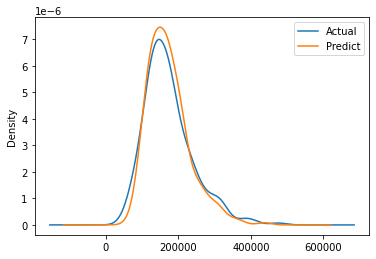

In [107]:
rf_reg = rf_price.plot.kde()

## *5.ExtraTreeRegressor*

In [108]:
from sklearn.ensemble import ExtraTreesRegressor
model5=ExtraTreesRegressor()
model5.fit(X_train,y_train)

ExtraTreesRegressor()

In [109]:
from sklearn.metrics import r2_score
y_predict5 = model5.predict(X_test)
xtr=(r2_score(y_test, y_predict5))
xtr

0.8734642414241941

In [110]:
xtr_train_score=model5.score(X_train,y_train)
xtr_train_score

1.0

In [111]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predict5))
print('MSE:', metrics.mean_squared_error(y_test,y_predict5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_predict5)))

MAE: 16071.004803149608
MSE: 572124135.1868685
RMSE: 23919.11652187155


In [112]:
xtr_price= pd.DataFrame({'Actual':y_test,'Predict':y_predict5})
xtr_price.head()

,Actual,Predict
897,142953,133183.17
668,168000,168734.37
653,135000,131413.91
900,110000,117200.03
386,81000,105477.60


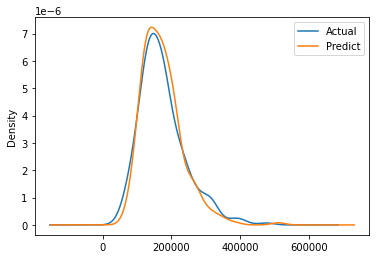

In [113]:
xt_reg = xtr_price.plot.kde()

## *models used and accuracy scores*

In [114]:
score= [['Linear Regression',lr],['Ridge Regression',rr], ['XGBoost Regressor',xgb],['Xtra tree Regressor',xtr], ['RandomForestRegressor',rf]]

home_price= pd.DataFrame(score, columns = ['Regression models', 'accuracy_scores'])
home_price

,Regression models,accuracy_scores
0,Linear Regression,0.872783
1,Ridge Regression,0.871882
2,XGBoost Regressor,0.860590
3,Xtra tree Regressor,0.873464
4,RandomForestRegressor,0.883306


<AxesSubplot:title={'center':'Regression models & accuracy scores'}, xlabel='Regression models', ylabel='accuracy_scores'>

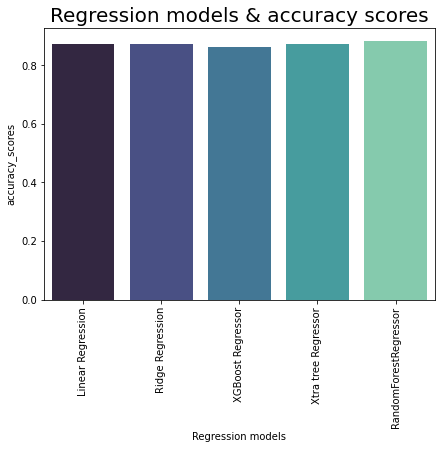

In [115]:
plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
plt.title('Regression models & accuracy scores',fontsize=20)
sns.barplot(x="Regression models", y="accuracy_scores",  data=home_price,palette = "mako")

<AxesSubplot:title={'center':'Xtra tree Regressor'}, xlabel='Actual', ylabel='Predict'>

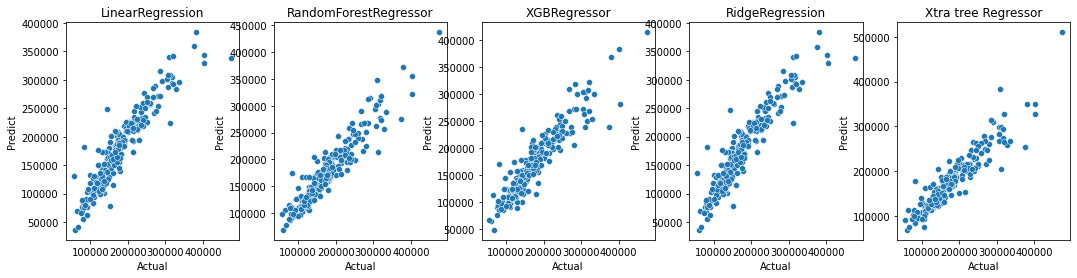

In [116]:
# Scatter plot for the results

plt.figure(figsize = (18,4))
ax = plt.subplot(1,5,1)
ax = plt.subplot(1,5,1).set_title('LinearRegression')
sns.scatterplot(x=lr_price.Actual, y=lr_price.Predict)
ax = plt.subplot(1,5,2)
ax = plt.subplot(1,5,2).set_title('RandomForestRegressor')
sns.scatterplot(x=rf_price.Actual, y=rf_price.Predict)
ax = plt.subplot(1,5,3)
ax = plt.subplot(1,5,3).set_title('XGBRegressor')
sns.scatterplot(x=xgb_price.Actual, y=xgb_price.Predict)
ax = plt.subplot(1,5,4)
ax = plt.subplot(1,5,4).set_title('RidgeRegression')
sns.scatterplot(x=rr_price.Actual, y=rr_price.Predict)
ax = plt.subplot(1,5,5)
ax = plt.subplot(1,5,5).set_title('Xtra tree Regressor')
sns.scatterplot(x=xtr_price.Actual, y=xtr_price.Predict)

## *Hyper parameter tuning for RandomForestRegressor*


In [135]:

from sklearn.model_selection import RandomizedSearchCV
random_grid = {
    'n_estimators' : [100,111,125, 120,130, 150, 180, 200,220,250],
    'max_features':['auto','sqrt'],
    'max_depth':[5,7,8,10,15,20,25,30],
    }

rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1,)

rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 7, 8, 10, 15, 20, 25,
                                                      30],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [100, 111, 125, 120,
                                                         130, 150, 180, 200,
                                                         220, 250]},
                   verbose=2)

In [136]:
rf_random.best_params_

{'n_estimators': 200, 'max_features': 'auto', 'max_depth': 25}

In [137]:
model=RandomForestRegressor(n_estimators=200, max_features='auto',max_depth=25)
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=25, n_estimators=200)

In [138]:
y_predict = model.predict(X_test)
rf1=(r2_score(y_test, y_predict))
rf1

0.8837950070805795

In [139]:
rf1_train_score=model.score(X_train,y_train)
rf1_train_score

0.9830057078247099

In [140]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test,y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

MAE: 15880.031522309711
MSE: 525414174.0383226
RMSE: 22921.91471143549


In [141]:
rf1_price= pd.DataFrame({'Actual':y_test,'Predict':y_predict})
rf1_price.head()

,Actual,Predict
897,142953,136610.070
668,168000,167899.000
653,135000,133468.720
900,110000,117872.270
386,81000,97330.905


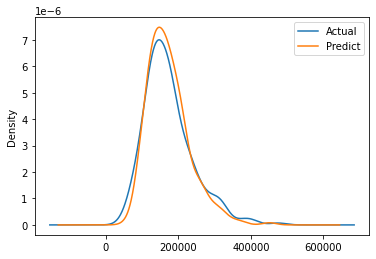

In [142]:
rf1_reg = rf1_price.plot.kde()

## *Adjusted R2 score*

In [146]:
# Adjusted R2 score

1 - (1-model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)`

0.831035268916015

In [147]:
1 - (1-model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

0.981566748465816

## *Hyperparameter tuning for XtraTreeRegressor*

In [149]:
from sklearn.model_selection import RandomizedSearchCV

param_grid={"n_estimators":[101,120,130,140,150],"criterion":["mse","mae"],
            "max_depth":[3,4,5,6,7,8],"min_samples_split":[2,3,4,5,6],"min_samples_leaf":[2,3,4,5],
            "max_features":["auto","sqrt"],"n_jobs":[-1,1],"random_state":[11,42,58]
                    }

xtr=ExtraTreesRegressor()

random_cv=RandomizedSearchCV(estimator=xtr,param_distributions=param_grid,n_iter=100,cv=10)

random_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=ExtraTreesRegressor(), n_iter=100,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [3, 4, 5, 6, 7, 8],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': [101, 120, 130, 140,
                                                         150],
                                        'n_jobs': [-1, 1],
                                        'random_state': [11, 42, 58]})

In [150]:
random_cv.best_params_

{'random_state': 11,
 'n_jobs': -1,
 'n_estimators': 120,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 8,
 'criterion': 'mse'}

In [153]:
modelx=RandomForestRegressor(n_estimators=140, max_depth=8,criterion="mse",random_state=11,n_jobs=-1,max_features="auto",min_samples_split=2,min_samples_leaf=2,)
modelx.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=2, n_estimators=140,
                      n_jobs=-1, random_state=11)

In [154]:
#R2 score for test

y_predict = modelx.predict(X_test)
xtr1=(r2_score(y_test, y_predict))
xtr1

0.8802010577588835

In [155]:
# R2 score for train 

xtr1_train_score=modelx.score(X_train,y_train)
xtr1_train_score

0.966051472990886

In [156]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test,y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

MAE: 16115.168497052904
MSE: 541664008.636255
RMSE: 23273.676302558113


In [157]:
xtr1_price= pd.DataFrame({'Actual':y_test,'Predict':y_predict})
xtr1_price.head()

,Actual,Predict
897,142953,139360.080071
668,168000,164745.098401
653,135000,134452.307416
900,110000,118256.537787
386,81000,105435.432293


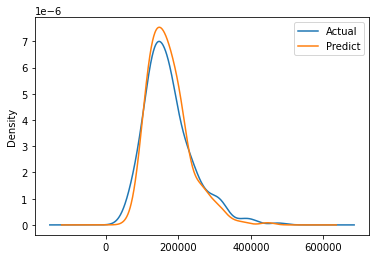

In [158]:
xtr1_reg = xtr1_price.plot.kde()

## *Adjusted R2 score*

In [159]:
1 - (1-modelx.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.8258095839827444

In [160]:
1 - (1-modelx.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

0.9631769460522793

- ### *After parameter tuning r2 score is increased, and also notice that overfitting is reduced in XtraTreeRegressor model.*